### Import the neccesary libraries

In [2]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib.collections import PolyCollection, LineCollection
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

csfont = {'fontname': 'Book Antiqua','fontsize': 16}
hfont = {'fontname': 'Book Antiqua', 'fontsize': 21}
title_font = {'fontname': 'Book Antiqua', 'fontsize': 16}

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data collection and preprocessing

In [2]:
df=pd.read_csv(r"C:\Users\karth\ANN\Time series\Modified_karthi\Primary data_Timeseries.csv")
df = df.interpolate(method='linear', axis=0)

### Import the neccesary libraries

In [3]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib.collections import PolyCollection, LineCollection
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

csfont = {'fontname': 'Book Antiqua','fontsize': 16}
hfont = {'fontname': 'Book Antiqua', 'fontsize': 21}
title_font = {'fontname': 'Book Antiqua', 'fontsize': 16}

In [4]:
df

,Hours,Biomass
0,0,2.218136
1,1,2.246091
2,2,2.274046
3,3,2.302000
4,4,2.329955
...,...,...
970,970,7.669376
971,971,7.671268
972,972,7.673161
973,973,7.675053


### ARIMA

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\karth\AppData\Local\Temp\ipykernel_14316\3430893377.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), **font)
C:\Users\karth\AppData\Local\Temp\ipykernel_14316\3430893377.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), **font)


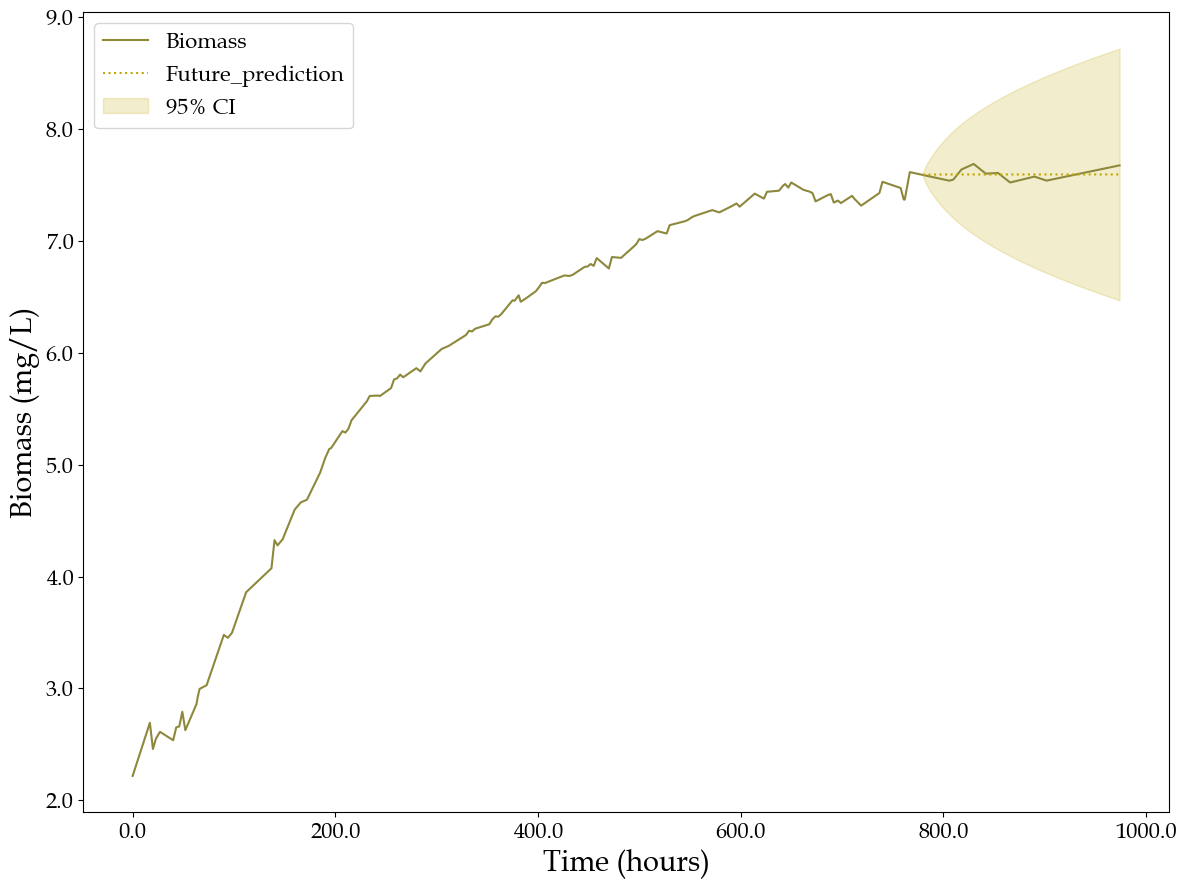

In [5]:
train = df.iloc[:len(df['Biomass'])-195] 
test = df.iloc[len(df['Biomass'])-195:] # set one year(12 months) for testing 

model=sm.tsa.arima.ARIMA(train['Biomass'],order=(1,1,3))
arima=model.fit()

start =780
end = 974

# Predictions for one-year against the test set 
predictions = arima.predict(start, end, typ = 'linear').rename("Predictions") 

ci = arima.get_forecast(steps=len(test)).conf_int()
  
font = {'fontname': 'Book Antiqua', 'fontsize': 16}
font_axis = {'fontname': 'Book Antiqua', 'fontsize': 21}

fig,ax=plt.subplots(figsize=(12,9))
ax.plot(df['Biomass'],label='Biomass',color='#8e883d')
ax.plot(predictions,label='Future_prediction',color='#C1a700',ls=':')
ax.fill_between(test.index, ci.iloc[:, 0], ci.iloc[:, 1], color='#C1a700', alpha=0.2, label='95% CI')
ax.legend(loc='upper left', prop={'size': 16, 'family': 'Book Antiqua'})
ax.set_xticklabels(ax.get_xticks(), **font)
ax.set_yticklabels(ax.get_yticks(), **font)
#ax.yaxis.set_major_formatter(y_formatter)
ax.set_xlabel('Time (hours)', **font_axis)
ax.set_ylabel('Biomass (mg/L)', **font_axis)
plt.tight_layout()
plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\models\\Results\\1_ARIMA.png", dpi=400)
plt.show()

In [6]:
df

,Hours,Biomass
0,0,2.218136
1,1,2.246091
2,2,2.274046
3,3,2.302000
4,4,2.329955
...,...,...
970,970,7.669376
971,971,7.671268
972,972,7.673161
973,973,7.675053


C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters fo

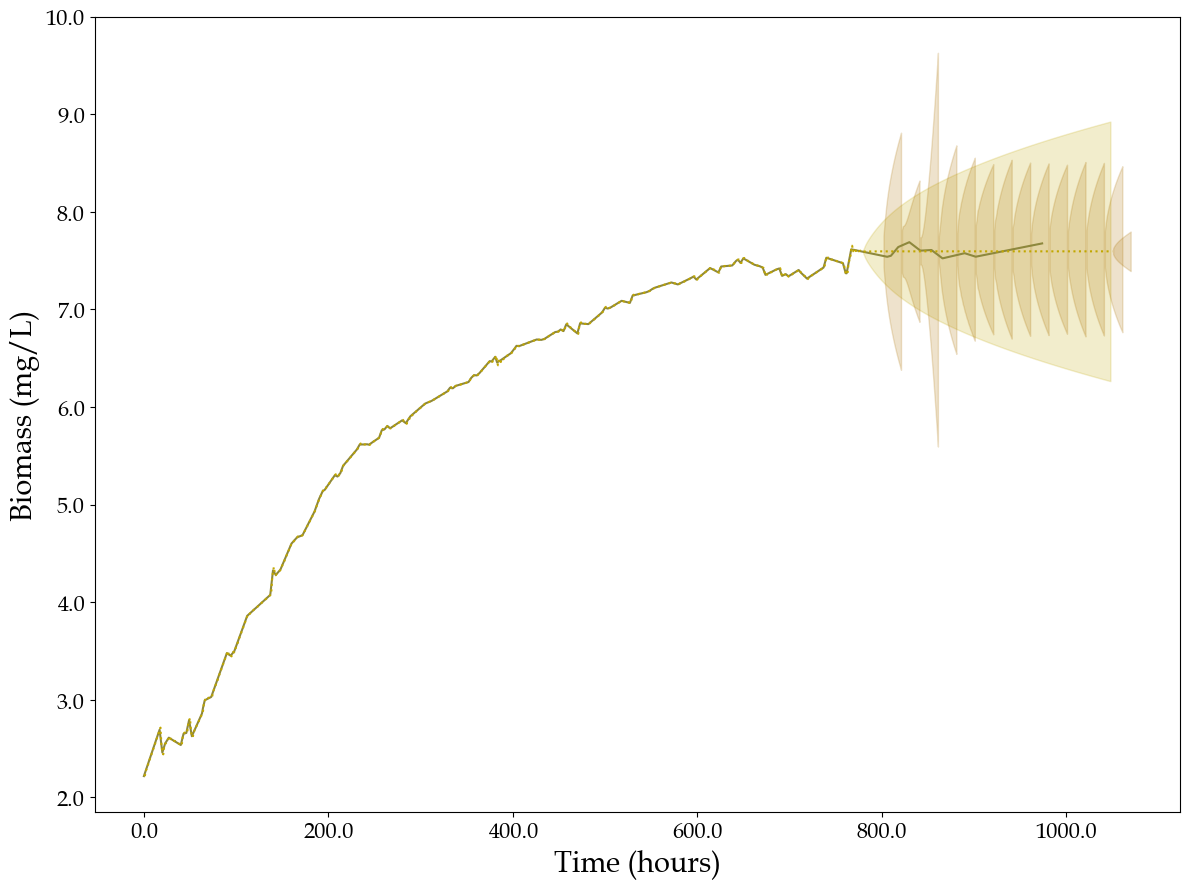

In [7]:
train = df.iloc[:len(df['Biomass']) - 195] 
test = df.iloc[len(df['Biomass']) - 195:]


# First set of predictions and confidence intervals
model_1 = sm.tsa.arima.ARIMA(train['Biomass'], order=(1, 1, 3))
arima_1 = model_1.fit()
start = 1
end = 1050
predictions_1 = arima_1.predict(start, end, typ='linear').rename("Predictions_1") 
ci_1 = arima_1.get_forecast(steps=269).conf_int()

# First set of predictions and confidence intervals
model_11 = sm.tsa.arima.ARIMA(train['Biomass'], order=(1, 1, 3))
arima_11 = model_11.fit()
start = 0
end = 780
predictions_11 = arima_11.predict(start, end, typ='linear').rename("Predictions_11") 
ci_11 = arima_11.get_forecast(steps=20).conf_int()

# Second set of predictions and confidence intervals
train = predictions_1
model_2 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_2 = model_2.fit()
start_2 = 0
end_2 = 800
predictions_2 = arima_2.predict(start_2, end_2, typ='linear').rename("Predictions_2") 
ci_2 = arima_2.get_forecast(steps=20).conf_int()

# Third set of predictions and confidence intervals
train = predictions_2
model_3 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_3 = model_3.fit()
start_3 = 0
end_3 = 820
predictions_3 = arima_3.predict(start_3, end_3, typ='linear').rename("Predictions_3") 
ci_3 = arima_3.get_forecast(steps=20).conf_int()

# Fourth set of predictions and confidence intervals
train = predictions_3
model_4 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_4 = model_4.fit()
start_4 = 0
end_4 = 840
predictions_4 = arima_4.predict(start_4, end_4, typ='linear').rename("Predictions_4") 
ci_4 = arima_4.get_forecast(steps=20).conf_int()

# Fifth set of predictions and confidence intervals
train = predictions_4
model_5 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_5 = model_5.fit()
start_5 = 0
end_5 = 860
predictions_5 = arima_5.predict(start_5, end_5, typ='linear').rename("Predictions_5") 
ci_5 = arima_5.get_forecast(steps=20).conf_int()

# Sixth set of predictions and confidence intervals
train = predictions_5
model_6 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_6 = model_6.fit()
start_6 = 0
end_6 = 880
predictions_6 = arima_6.predict(start_6, end_6, typ='linear').rename("Predictions_6") 
ci_6 = arima_6.get_forecast(steps=20).conf_int()

# Seventh set of predictions and confidence intervals
train = predictions_6
model_7 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_7 = model_7.fit()
start_7 = 0
end_7 = 900
predictions_7 = arima_7.predict(start_7, end_7, typ='linear').rename("Predictions_7") 
ci_7 = arima_7.get_forecast(steps=20).conf_int()

# Eighth set of predictions and confidence intervals
train = predictions_7
model_8 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_8 = model_8.fit()
start_8 = 0
end_8 = 920
predictions_8 = arima_8.predict(start_8, end_8, typ='linear').rename("Predictions_8") 
ci_8 = arima_8.get_forecast(steps=20).conf_int()

# Ninth set of predictions and confidence intervals
train = predictions_8
model_9 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_9 = model_9.fit()
start_9 = 0
end_9 = 940
predictions_9 = arima_9.predict(start_9, end_9, typ='linear').rename("Predictions_9") 
ci_9 = arima_9.get_forecast(steps=20).conf_int()

# Tenth set of predictions and confidence intervals
train = predictions_9
model_10 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_10 = model_10.fit()
start_10 = 0
end_10 = 960
predictions_10 = arima_10.predict(start_10, end_10, typ='linear').rename("Predictions_10") 
ci_10 = arima_10.get_forecast(steps=20).conf_int()

# Eleventh set of predictions and confidence intervals
train = predictions_10
model_11 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_11 = model_11.fit()
start_11 = 0
end_11 = 980
predictions_11 = arima_11.predict(start_11, end_11, typ='linear').rename("Predictions_11") 
ci_11 = arima_11.get_forecast(steps=20).conf_int()

# Twelfth set of predictions and confidence intervals
train = predictions_11
model_12 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_12 = model_12.fit()
start_12 = 0
end_12 = 1000
predictions_12 = arima_12.predict(start_12, end_12, typ='linear').rename("Predictions_12") 
ci_12 = arima_12.get_forecast(steps=20).conf_int()

# Thirteenth set of predictions and confidence intervals
train = predictions_12
model_13 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_13 = model_13.fit()
start_13 = 0
end_13 = 1020
predictions_13 = arima_13.predict(start_13, end_13, typ='linear').rename("Predictions_13") 
ci_13 = arima_13.get_forecast(steps=20).conf_int()

# Fourteenth set of predictions and confidence intervals
train = predictions_13
model_14 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_14 = model_14.fit()
start_14 = 0
end_14 = 1040
predictions_14 = arima_14.predict(start_14, end_14, typ='linear').rename("Predictions_14") 
ci_14 = arima_14.get_forecast(steps=20).conf_int()

# Fifteenth set of predictions and confidence intervals
train = predictions_14
model_15 = sm.tsa.arima.ARIMA(train, order=(1, 1, 3))
arima_15 = model_15.fit()
start_15 = 0
end_15 = 1060
predictions_15 = arima_15.predict(start_15, end_15, typ='linear').rename("Predictions_15") 
ci_15 = arima_15.get_forecast(steps=20).conf_int()

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(df['Biomass'], label='Biomass', color='#8e883d')
ax.plot(predictions_1,label='Future_prediction',color='#C1a700',ls=':')

# First set of predictions and confidence intervals
ax.fill_between(ci_1.index, ci_1.iloc[:, 0], ci_1.iloc[:, 1], color='#C1a700', alpha=0.2, label='95% CI_1')

# Second set of predictions and confidence intervals
ax.fill_between(ci_2.index, ci_2.iloc[:, 0], ci_2.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_2')

# Third set of predictions and confidence intervals
ax.fill_between(ci_3.index, ci_3.iloc[:, 0], ci_3.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_3')

# Fourth set of predictions and confidence intervals
ax.fill_between(ci_4.index, ci_4.iloc[:, 0], ci_4.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_4')

# Fifth set of predictions and confidence intervals
ax.fill_between(ci_5.index, ci_5.iloc[:, 0], ci_5.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_5')

# Sixth set of predictions and confidence intervals
ax.fill_between(ci_6.index, ci_6.iloc[:, 0], ci_6.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_6')

# Seventh set of predictions and confidence intervals
ax.fill_between(ci_7.index, ci_7.iloc[:, 0], ci_7.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_7')

# Eighth set of predictions and confidence intervals
ax.fill_between(ci_8.index, ci_8.iloc[:, 0], ci_8.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_8')

# Ninth set of predictions and confidence intervals
ax.fill_between(ci_9.index, ci_9.iloc[:, 0], ci_9.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_9')

# Tenth set of predictions and confidence intervals
ax.fill_between(ci_10.index, ci_10.iloc[:, 0], ci_10.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_10')

# Eleventh set of predictions and confidence intervals
ax.fill_between(ci_11.index, ci_11.iloc[:, 0], ci_11.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_11')

# Twelfth set of predictions and confidence intervals
ax.fill_between(ci_12.index, ci_12.iloc[:, 0], ci_12.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_12')

# Thirteenth set of predictions and confidence intervals
ax.fill_between(ci_13.index, ci_13.iloc[:, 0], ci_13.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_13')

# Fourteenth set of predictions and confidence intervals
ax.fill_between(ci_14.index, ci_14.iloc[:, 0], ci_14.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_14')

# Fifteenth set of predictions and confidence intervals
ax.fill_between(ci_15.index, ci_15.iloc[:, 0], ci_15.iloc[:, 1], color='#AB7100', alpha=0.2, label='95% CI_15')

ax.set_xlabel('Time (hours)', **font_axis)
ax.set_ylabel('Biomass (mg/L)', **font_axis)
ax.set_xticklabels(ax.get_xticks(), **font)
ax.set_yticklabels(ax.get_yticks(), **font)
plt.tight_layout()
plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\models\\Results\\1_ARIMA_1.png", dpi=400)
plt.show()


In [8]:
train = df.iloc[:len(df['Biomass']) - 195] 
test = df.iloc[len(df['Biomass']) - 195:]

In [9]:
# Extract actual and predicted data
pred=arima.predict(start=0,end=1017)
df['Biomass_Predicted_ARIMA']=pred
actual_train = train['Biomass']
predicted_train = arima.fittedvalues
actual_test = test['Biomass']
predicted_test = predictions

# Create a DataFrame for train and test data
train_data = pd.DataFrame({'Actual Train': actual_train, 'Predicted Train': predicted_train})
test_data = pd.DataFrame({'Actual Test': actual_test, 'Predicted Test': predicted_test})

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=1)

# Save combined data to an Excel file
combined_data.to_excel("1_ARIMA.xlsx", index=False)


In [10]:
import pandas as pd

# Calculate residuals for train and test data
train_residuals = actual_train - predicted_train
test_residuals = actual_test - predicted_test

# Create a DataFrame to store residuals
residuals_data = pd.DataFrame({
    'Train Residuals': train_residuals,
    'Test Residuals': test_residuals
})

# Save residuals to an Excel file
residuals_data.to_excel("ARIMA_Residuals.xlsx", index=False)

In [11]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for training data
mae_train = mean_absolute_error(actual_train, predicted_train)
rmse_train = np.sqrt(mean_squared_error(actual_train, predicted_train))
mape_train = mean_absolute_percentage_error(actual_train, predicted_train)

# Calculate metrics for testing data
mae_test = mean_absolute_error(actual_test, predicted_test)
rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test))
mape_test = mean_absolute_percentage_error(actual_test, predicted_test)

# Print metrics
print("Train Metrics:")
print("MAPE Train:", mape_train)
print("MAE Train:", mae_train)
print("RMSE Train:", rmse_train)
print()
print("Test Metrics:")
print("MAPE Test:", mape_test)
print("MAE Test:", mae_test)
print("RMSE Test:", rmse_test)


Train Metrics:
MAPE Train: 0.2263031988278582
MAE Train: 0.007293621048417328
RMSE Train: 0.07996128718612006

Test Metrics:
MAPE Test: 0.48643089391685973
MAE Test: 0.036971558258292674
RMSE Test: 0.04306669162974711


### LSTM

In [12]:
# Load the dataset
df=pd.read_csv(r"C:\Users\karth\ANN\Time series\Modified_karthi\Primary data_Timeseries.csv")
df = df.interpolate(method='linear', axis=0)
dataframe = pd.DataFrame(df["Biomass"])
scaler_toolbox = MinMaxScaler()
# Convert to Numpy Array and Normalize

In [13]:
data = dataframe.values
data = scaler_toolbox.fit_transform(data)


In [14]:
data = dataframe.values
data = scaler_toolbox.fit_transform(data)

# Prepare the dataset for the LSTM model
partition_size = int(len(data) * 0.9)
remainder_size = len(data) - partition_size
train_partition, test_partition = data[0:partition_size,:], data[partition_size:len(data),:]

def organize_data(sequence_data, history_length=1):
    input_data, target_data = [], []
    for idx in range(len(sequence_data)-history_length-1):
        fragment = sequence_data[idx:(idx+history_length), 0]
        input_data.append(fragment)
        target_data.append(sequence_data[idx + history_length, 0])
    return np.array(input_data), np.array(target_data)

history_length = 1
train_input, train_target = organize_data(train_partition, history_length)
test_input, test_target = organize_data(test_partition, history_length)


train_input = np.reshape(train_input, (train_input.shape[0], 1, train_input.shape[1]))
test_input = np.reshape(test_input, (test_input.shape[0], 1, test_input.shape[1]))

# Build and Train LSTM Network
LSTM_model = Sequential()
LSTM_model.add(LSTM(4, input_shape=(1, history_length)))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(train_input, train_target, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
875/875 - 4s - loss: 0.1334 - 4s/epoch - 5ms/step
Epoch 2/50
875/875 - 2s - loss: 0.0116 - 2s/epoch - 2ms/step
Epoch 3/50
875/875 - 2s - loss: 6.2392e-04 - 2s/epoch - 2ms/step
Epoch 4/50
875/875 - 2s - loss: 6.3647e-05 - 2s/epoch - 2ms/step
Epoch 5/50
875/875 - 2s - loss: 5.3016e-05 - 2s/epoch - 2ms/step
Epoch 6/50
875/875 - 2s - loss: 4.5600e-05 - 2s/epoch - 2ms/step
Epoch 7/50
875/875 - 2s - loss: 4.2404e-05 - 2s/epoch - 2ms/step
Epoch 8/50
875/875 - 2s - loss: 4.0354e-05 - 2s/epoch - 2ms/step
Epoch 9/50
875/875 - 2s - loss: 4.1558e-05 - 2s/epoch - 2ms/step
Epoch 10/50
875/875 - 2s - loss: 4.1308e-05 - 2s/epoch - 2ms/step
Epoch 11/50
875/875 - 2s - loss: 3.8975e-05 - 2s/epoch - 2ms/step
Epoch 12/50
875/875 - 2s - loss: 4.0312e-05 - 2s/epoch - 2ms/step
Epoch 13/50
875/875 - 2s - loss: 3.9663e-05 - 2s/epoch - 2ms/step
Epoch 14/50
875/875 - 2s - loss: 3.8407e-05 - 2s/epoch - 2ms/step
Epoch 15/50
875/875 - 2s - loss: 3.5506e-05 - 2s/epoch - 2ms/step
Epoch 16/50
875/875 - 2s - 

### Performance evaluation_LSTM

In [15]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make Predictions and Assess Model
train_forecast = LSTM_model.predict(train_input)
test_forecast = LSTM_model.predict(test_input)

# Inverse transform to get actual values
train_forecast = scaler_toolbox.inverse_transform(train_forecast)
train_target = scaler_toolbox.inverse_transform([train_target])
test_forecast = scaler_toolbox.inverse_transform(test_forecast)
test_target = scaler_toolbox.inverse_transform([test_target])

# Calculate MAPE for training and testing
mape_train = mean_absolute_percentage_error(train_target[0], train_forecast[:, 0])
mape_test = mean_absolute_percentage_error(test_target[0], test_forecast[:, 0])

# Calculate mean squared error (MSE)
mse_train = mean_squared_error(train_target[0], train_forecast[:, 0])
mse_test = mean_squared_error(test_target[0], test_forecast[:, 0])

# Calculate mean absolute error (MAE)
mae_train = mean_absolute_error(train_target[0], train_forecast[:, 0])
mae_test = mean_absolute_error(test_target[0], test_forecast[:, 0])

# Calculate root mean squared error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print('Training Evaluation:')
print('MAPE Train:', mape_train)
print('Mean Absolute Error:', mae_train)
print('Root Mean Squared Error:', rmse_train)

print('\nTesting Evaluation:')
print('MAPE Test:', mape_test)
print('Mean Absolute Error:', mae_test)
print('Root Mean Squared Error:', rmse_test)

# Convert arrays to DataFrame for easy comparison
train_data = pd.DataFrame({'Actual Train': train_target[0].flatten(), 'Predicted Train': train_forecast[:, 0]})
test_data = pd.DataFrame({'Actual Test': test_target[0].flatten(), 'Predicted Test': test_forecast[:, 0]})

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=0)

# Save combined data to an Excel file
combined_data.to_excel("2_LSTM.xlsx", index=False)


3/3 [==============================] - 0s 3ms/step
Training Evaluation:
MAPE Train: 0.3452242117629572
Mean Absolute Error: 0.018244695876382073
Root Mean Squared Error: 0.022165485444736628

Testing Evaluation:
MAPE Test: 0.06650892153081764
Mean Absolute Error: 0.005039707895637467
Root Mean Squared Error: 0.005750260208791804


In [18]:
import pandas as pd

# Calculate residuals for train and test data
train_data = pd.DataFrame({
    'Actual Train': train_target[0].flatten(),
    'Predicted Train': train_forecast[:, 0],
    'Train Residuals': train_target[0].flatten() - train_forecast[:, 0]
})

test_data = pd.DataFrame({
    'Actual Test': test_target[0].flatten(),
    'Predicted Test': test_forecast[:, 0],
    'Test Residuals': test_target[0].flatten() - test_forecast[:, 0]
})

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=0)

# Save combined data to an Excel file
combined_data.to_excel("LSTM_Residuals.xlsx", index=False)


### plotting LSTM

C:\Users\karth\AppData\Local\Temp\ipykernel_14568\3418419774.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), **font)
C:\Users\karth\AppData\Local\Temp\ipykernel_14568\3418419774.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), **font)


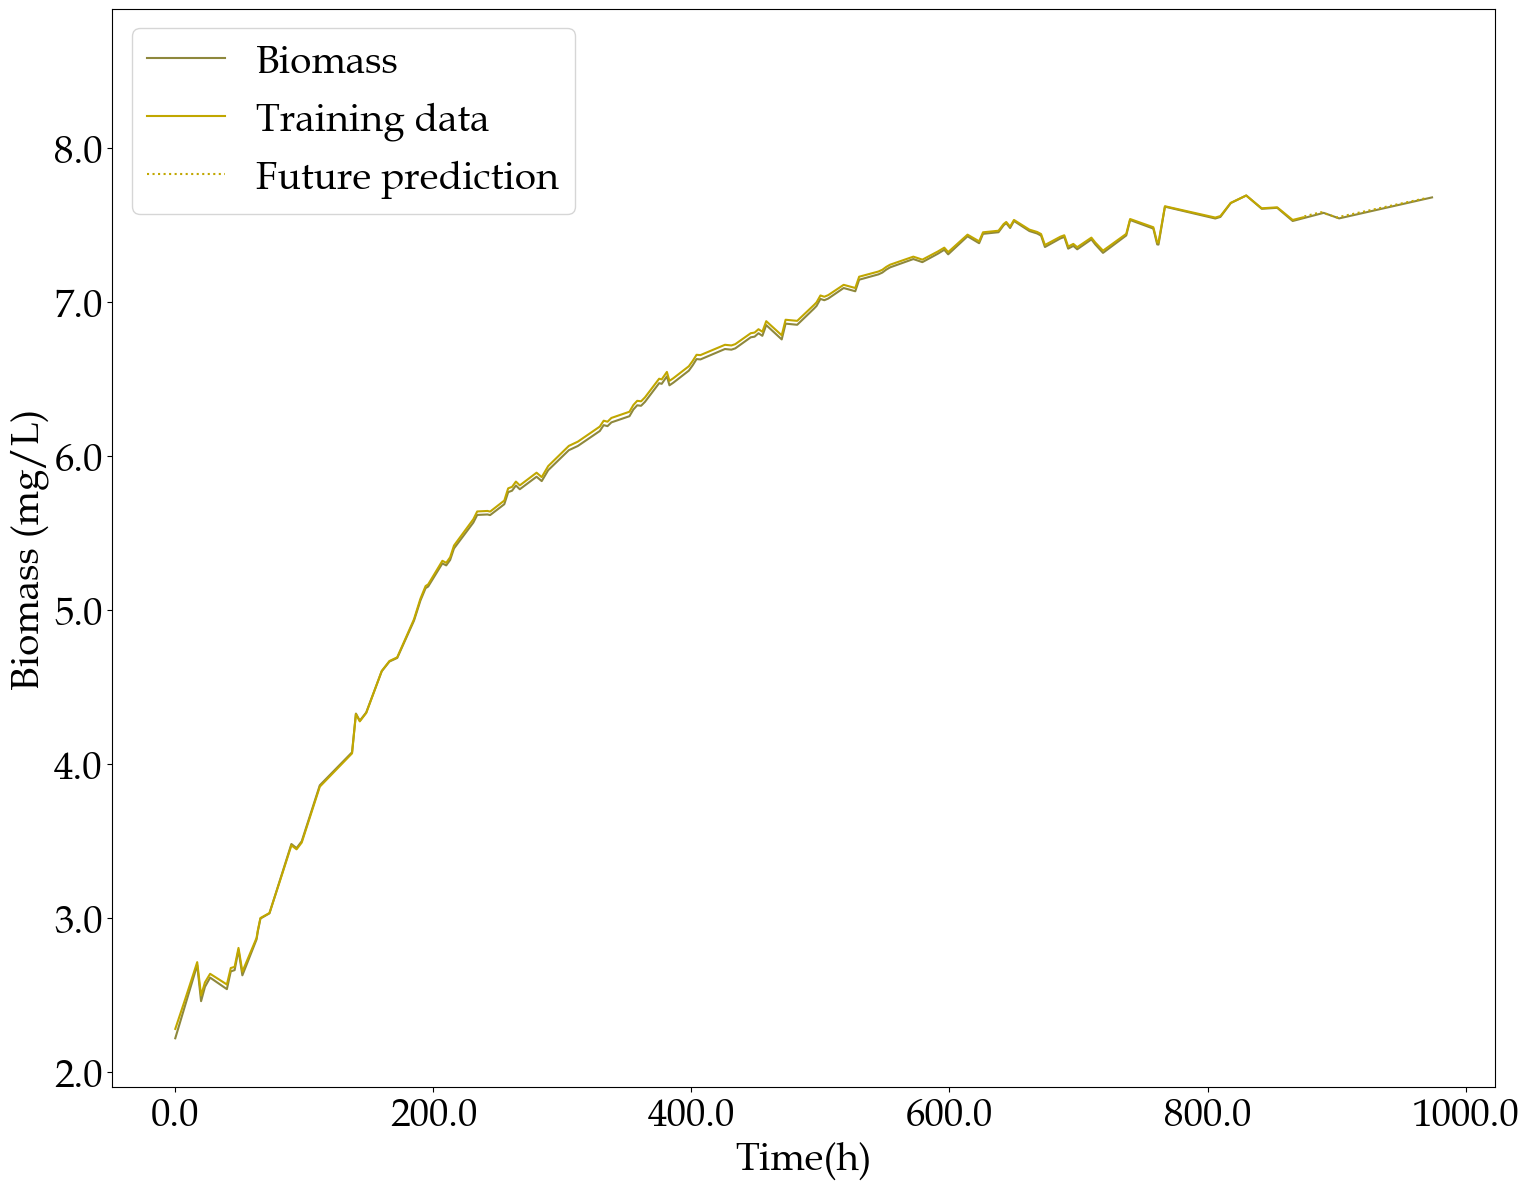

In [42]:
font = {'fontname': 'Book Antiqua', 'fontsize': 28}
font_axis = {'fontname': 'Book Antiqua', 'fontsize': 28}

fig, ax = plt.subplots(figsize=(15.428568,12))
ax.plot(scaler_toolbox.inverse_transform(data), label='Biomass', color='#8e883d')
ax.plot([item for item in train_forecast], label='Training data', color='#C1a700')
ax.plot([item+len(train_forecast) for item in range(len(test_forecast))], test_forecast, label='Future prediction', color='#C1a700', ls=':')
ax.legend(loc='upper left', prop={'size': 28, 'family': 'Book Antiqua'})
ax.set_xticklabels(ax.get_xticks(), **font)
ax.set_yticklabels(ax.get_yticks(), **font)
ax.set_xlabel('Time(h)', **font_axis)
ax.set_ylabel('Biomass (mg/L)', **font_axis)
ax.set_ylim(1.9, 8.9)
plt.tight_layout()
plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\models\\Results\\2_LSTM.png", dpi=400)
plt.show()


### XGBoost

In [19]:
# Creating lag features for time-series data

import numpy as np
import tensorflow as tf
import random

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

def create_lag_features(data, lag_steps=1):
    for i in range(1, lag_steps + 1):
         data[f'lag_{i}'] = data['Biomass'].shift(i)
    return data
# Applying lag feature creation to the dataset
lagged_data = create_lag_features(df, lag_steps=3)

In [20]:
# Creating rolling mean for time-series data

def create_rolling_mean(data, window_size=3):
    data['rolling_mean'] = data['Biomass'].rolling(window=window_size).mean()
    return data

# Applying rolling mean to the dataset

rolled_data = create_rolling_mean(df, window_size=5)

In [21]:
# Applying Fourier transformation for capturing seasonality
from scipy.fft import fft
def apply_fourier_transform(data):
    values = data['Biomass'].values
    fourier_transform = fft(values)
    data['fourier_transform'] = np.abs(fourier_transform)
    return data

# Applying Fourier transformation to the dataset
fourier_data = apply_fourier_transform(df)
# Splitting time-series data into training and testing sets
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]
X_train, y_train = train_data.drop(columns=['Biomass']), train_data['Biomass']
X_test, y_test = test_data.drop(columns=['Biomass']), test_data['Biomass']
# Hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Training the XGBoost model
from xgboost import XGBRegressor
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Plottting XGBoost

C:\Users\karth\AppData\Local\Temp\ipykernel_14316\2232665069.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), **font)
C:\Users\karth\AppData\Local\Temp\ipykernel_14316\2232665069.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), **font)


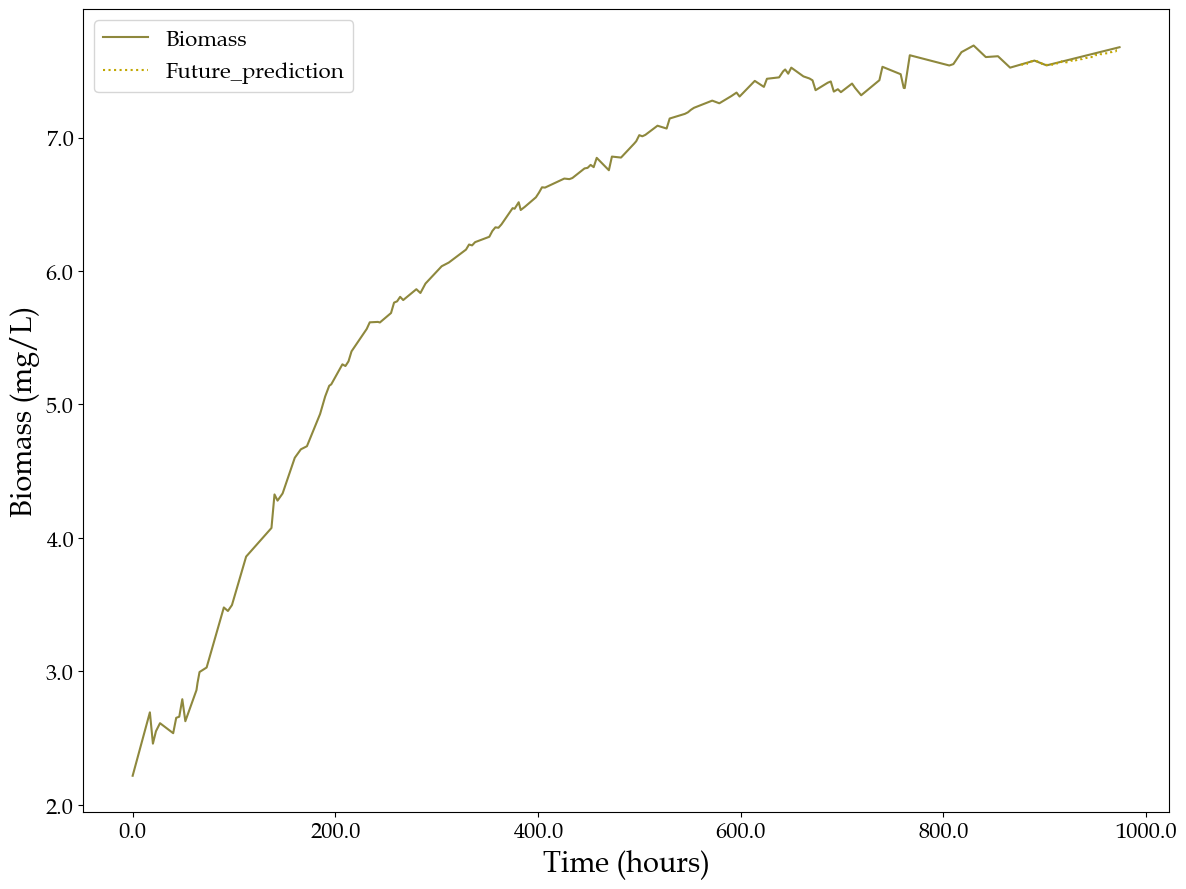

In [22]:
# Evaluating the XGBoost model on the testing set
predictions_train = xgb_model.predict(X_train)
predictions_test = xgb_model.predict(X_test)

font = {'fontname': 'Book Antiqua', 'fontsize': 16}
font_axis = {'fontname': 'Book Antiqua', 'fontsize': 21}

start_index = 0
end_index = 994

# Plotting actual vs. predicted values
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(df['Biomass'], label='Biomass', color='#8e883d')
predictions_series = pd.Series(predictions_test, index=y_test.index)
ax.plot(predictions_series, label='Future_prediction', color='#C1a700', ls=':')
ax.legend(loc='upper left', prop={'size': 16, 'family': 'Book Antiqua'})
ax.set_xticklabels(ax.get_xticks(), **font)
ax.set_yticklabels(ax.get_yticks(), **font)
ax.set_xlabel('Time (hours)', **font_axis)
ax.set_ylabel('Biomass (mg/L)', **font_axis)
plt.tight_layout()
plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\models\\Results\\3_XGB.png", dpi=400)
plt.show()

### performance evaluation XGBoost

In [23]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make predictions on the train and test sets
predictions_train = xgb_model.predict(X_train)
predictions_test = xgb_model.predict(X_test)

# Calculate MAPE for training and testing data
mape_train = mean_absolute_percentage_error(y_train, predictions_train)
mape_test = mean_absolute_percentage_error(y_test, predictions_test)

# Calculate mean squared error (MSE)
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

# Calculate mean absolute error (MAE)
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)

# Calculate root mean squared error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("Train Metrics:")
print("MAPE Train:", mape_train)
print("MAE Train:", mae_train)
print("RMSE Train:", rmse_train)
print()
print("Test Metrics:")
print("MAPE Test:", mape_test)
print("MAE Test:", mae_test)
print("RMSE Test:", rmse_test)
print("Mean Value of Test Dataset:", y_test.mean())

# Combine actual and predicted values for train and test data
combined_data_train = pd.concat([y_train, pd.Series(predictions_train, index=y_train.index)], axis=1)
combined_data_test = pd.concat([y_test, pd.Series(predictions_test, index=y_test.index)], axis=1)

# Rename columns
combined_data_train.columns = ['actual_train', 'predicted_train']
combined_data_test.columns = ['actual_test', 'predicted_test']

# Concatenate train and test DataFrames
combined_data = pd.concat([combined_data_train, combined_data_test], axis=0)

# Save combined data to an Excel file
combined_data.to_excel("3_XGBoost.xlsx", index=False)


Train Metrics:
MAPE Train: 0.14775033480763633
MAE Train: 0.00774284585314873
RMSE Train: 0.010719573898097778

Test Metrics:
MAPE Test: 0.15602210443769848
MAE Test: 0.01188648476618083
RMSE Test: 0.01416372727169429
Mean Value of Test Dataset: 7.59655352107228


In [24]:
import pandas as pd

# Combine actual and predicted values for train and test data
combined_data_train = pd.concat([
    y_train,
    pd.Series(predictions_train, index=y_train.index),
    pd.Series(y_train - predictions_train, index=y_train.index)
], axis=1)

combined_data_test = pd.concat([
    y_test,
    pd.Series(predictions_test, index=y_test.index),
    pd.Series(y_test - predictions_test, index=y_test.index)
], axis=1)

# Rename columns
combined_data_train.columns = ['actual_train', 'predicted_train', 'train_residuals']
combined_data_test.columns = ['actual_test', 'predicted_test', 'test_residuals']

# Concatenate train and test DataFrames
combined_data = pd.concat([combined_data_train, combined_data_test], axis=0)

# Save combined data to an Excel file
combined_data.to_excel("XGBoost_Residuals_With_Data.xlsx", index=False)


### Prophet

In [25]:
# read the Input data
df = pd.read_csv(r"C:\Users\karth\ANN\Time series\Modified_karthi\prophet.csv")
df['Days'] = pd.DatetimeIndex(df['Days'])
df.rename(columns={'Biomass': 'y'}, inplace=True)
df.rename(columns={'Days': 'ds'}, inplace=True)
#filling the missing values by interpolation
df = df.interpolate(method='linear', axis=0)

# train test split
train_prophet = df.iloc[:len(df)-195] 
test_prophet = df.iloc[len(df)-195:]
#Fitting the model
model = Prophet(changepoint_prior_scale = 0.05)
proph=model.fit(train_prophet)
# Forecast ahead the train set
future_dates = model.make_future_dataframe(periods=195, freq='H')
predictions = model.predict(future_dates)

15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:25 - cmdstanpy - INFO - Chain [1] done processing


### plotting_Prophet

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\karth\AppData\Local\Temp\ipykernel_14316\1853670876.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), **font)
C:\

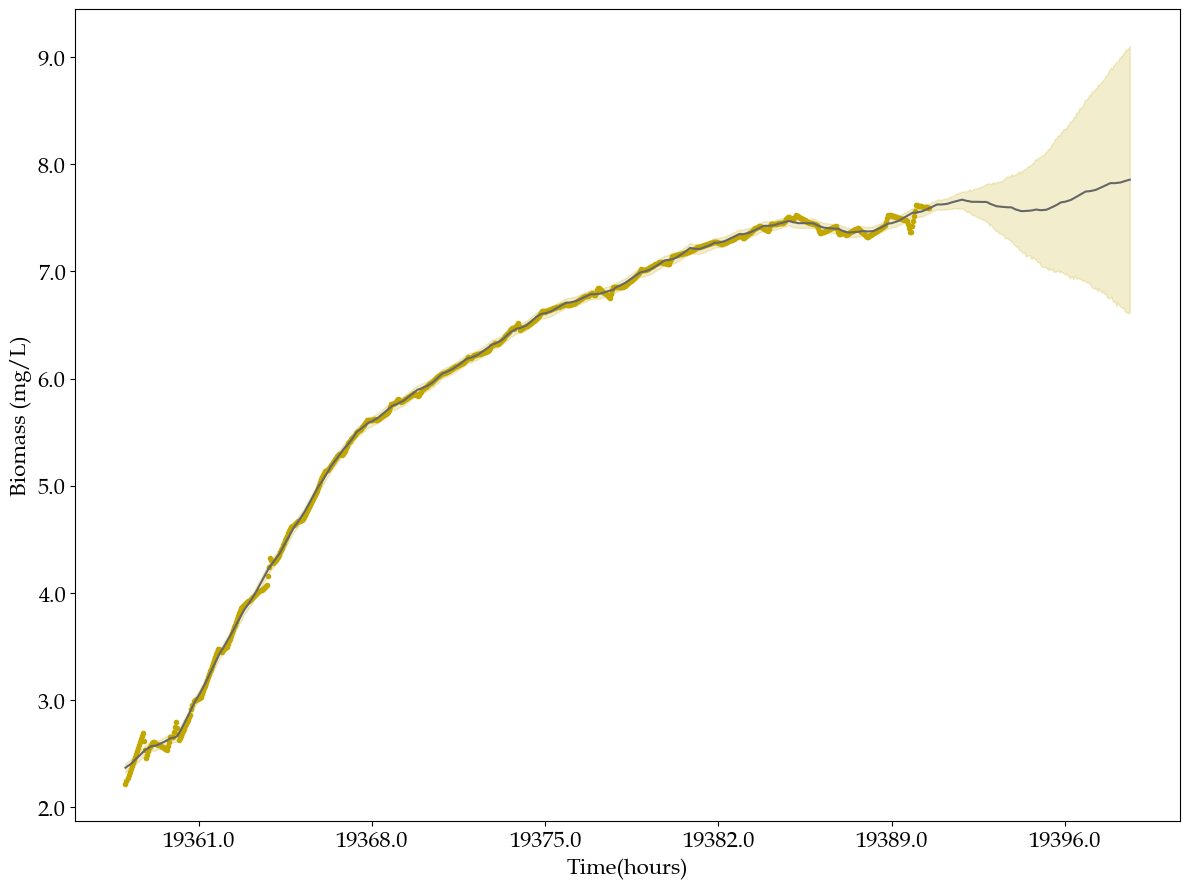

In [26]:
# plotting the predicted results

csfont = {'fontname': 'Book Antiqua','fontsize': 16}
hfont = {'fontname': 'Book Antiqua', 'fontsize': 21}
title_font = {'fontname': 'Book Antiqua', 'fontsize': 16}
fig, ax = plt.subplots(figsize=(12,9))
model.plot(predictions, ax=ax)
ax.set_xlabel('Time(h)', fontsize=21, fontname='Book Antiqua')
ax.set_ylabel('Biomass (mg/L)', fontsize=21, fontname='Book Antiqua')
ax.set_xticklabels(ax.get_xticks(), **font)
ax.set_yticklabels(ax.get_yticks(), **font)
lines = ax.get_lines()
lines[0].set_color('#C1a700')
lines[1].set_color('#666666')
fill = ax.collections[0] 
fill.set_color('#C1a700')
ax.grid(False)
ax.set_ylabel('Biomass (mg/L)', **csfont)
ax.set_xlabel('Time(hours)', **csfont)
plt.tight_layout()
plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\models\\Results\\4_Prophet.png",transparent=True, dpi=400)
plt.show()

### Performance evaluation_Prophet

In [27]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Split the data into training and testing sets
train = df.iloc[:len(df)-195] 
actual_train = df.iloc[:len(df['y'])-195,1]
predicted_train = predictions.iloc[:len(predictions['yhat'])-195,1]
actual_test = df.iloc[len(df['y'])-195:, 1] 
predicted_test = predictions.iloc[len(predictions['yhat'])-195:,1]

# Calculate MAPE for training and testing data
mape_train = mean_absolute_percentage_error(actual_train, predicted_train)
mape_test = mean_absolute_percentage_error(actual_test, predicted_test)

# Calculate mean squared error (MSE)
mse_train = mean_squared_error(actual_train, predicted_train)
mse_test = mean_squared_error(actual_test, predicted_test)

# Calculate mean absolute error (MAE)
mae_train = mean_absolute_error(actual_train, predicted_train)
mae_test = mean_absolute_error(actual_test, predicted_test)

# Calculate root mean squared error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([actual_train, predicted_train, actual_test, predicted_test], axis=1)
combined_data.columns = ['actual_train', 'predicted_train', 'actual_test', 'predicted_test']

# Save combined data to an Excel file
combined_data.to_excel("4_prophet.xlsx", index=False)

# Print evaluation metrics
print("Train Metrics:")
print("MAPE Train:", mape_train)
print("MAE Train:", mae_train)
print("RMSE Train:", rmse_train)

print()
print("Test Metrics:")
print("MAPE Test:", mape_test)
print("MAE Test:", mae_test)
print("RMSE Test:", rmse_test)
print("Mean Value of Test Dataset:", actual_test.mean())


Train Metrics:
MAPE Train: 1.1796588561300037
MAE Train: 0.06072166702414
RMSE Train: 0.07035784583311681

Test Metrics:
MAPE Test: 1.0561231830647722
MAE Test: 0.08018517250641675
RMSE Test: 0.09139223906285804
Mean Value of Test Dataset: 7.594010801474359


In [28]:
import pandas as pd

# Calculate residuals for train and test data
train_residuals = actual_train - predicted_train
test_residuals = actual_test - predicted_test

# Concatenate actual, predicted, and residuals for train and test data into a single DataFrame
combined_data = pd.concat([
    actual_train, 
    predicted_train, 
    train_residuals, 
    actual_test, 
    predicted_test, 
    test_residuals
], axis=1)

# Rename columns
combined_data.columns = [
    'actual_train', 
    'predicted_train', 
    'train_residuals', 
    'actual_test', 
    'predicted_test', 
    'test_residuals'
]

# Save combined data to an Excel file
combined_data.to_excel("Prophet_Residuals_With_Data.xlsx", index=False)


### PINN

Epoch 0, Loss: 38.10285568237305
Epoch 500, Loss: 6.065360069274902
Epoch 1000, Loss: 4.320315837860107
Epoch 1500, Loss: 2.5396931171417236
Epoch 2000, Loss: 1.7007288932800293
Epoch 2500, Loss: 1.1634259223937988
Epoch 3000, Loss: 0.7644668221473694
Epoch 3500, Loss: 0.47383007407188416
Epoch 4000, Loss: 0.2720912992954254
Epoch 4500, Loss: 0.14124149084091187
Epoch 5000, Loss: 0.06516310572624207
Epoch 5500, Loss: 0.026559757068753242
Epoch 6000, Loss: 0.010438688099384308
Epoch 6500, Loss: 0.005251600407063961
Epoch 7000, Loss: 0.004070199094712734
Epoch 7500, Loss: 0.0038342697080224752
Epoch 8000, Loss: 0.003775626653805375
Epoch 8500, Loss: 0.0037263049744069576
Epoch 9000, Loss: 0.0036800226662307978
Epoch 9500, Loss: 0.003635765053331852
Train MAPE: 0.8601299487054348
Train MAE: 0.048114318400621414
Train RMSE: 0.05943266302347183

Test MAPE: 0.5206691101193428
Test MAE: 0.03952810540795326
Test RMSE: 0.047570984810590744


C:\Users\karth\AppData\Local\Temp\ipykernel_14316\778629228.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), **font_ticks)
C:\Users\karth\AppData\Local\Temp\ipykernel_14316\778629228.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), **font_ticks)


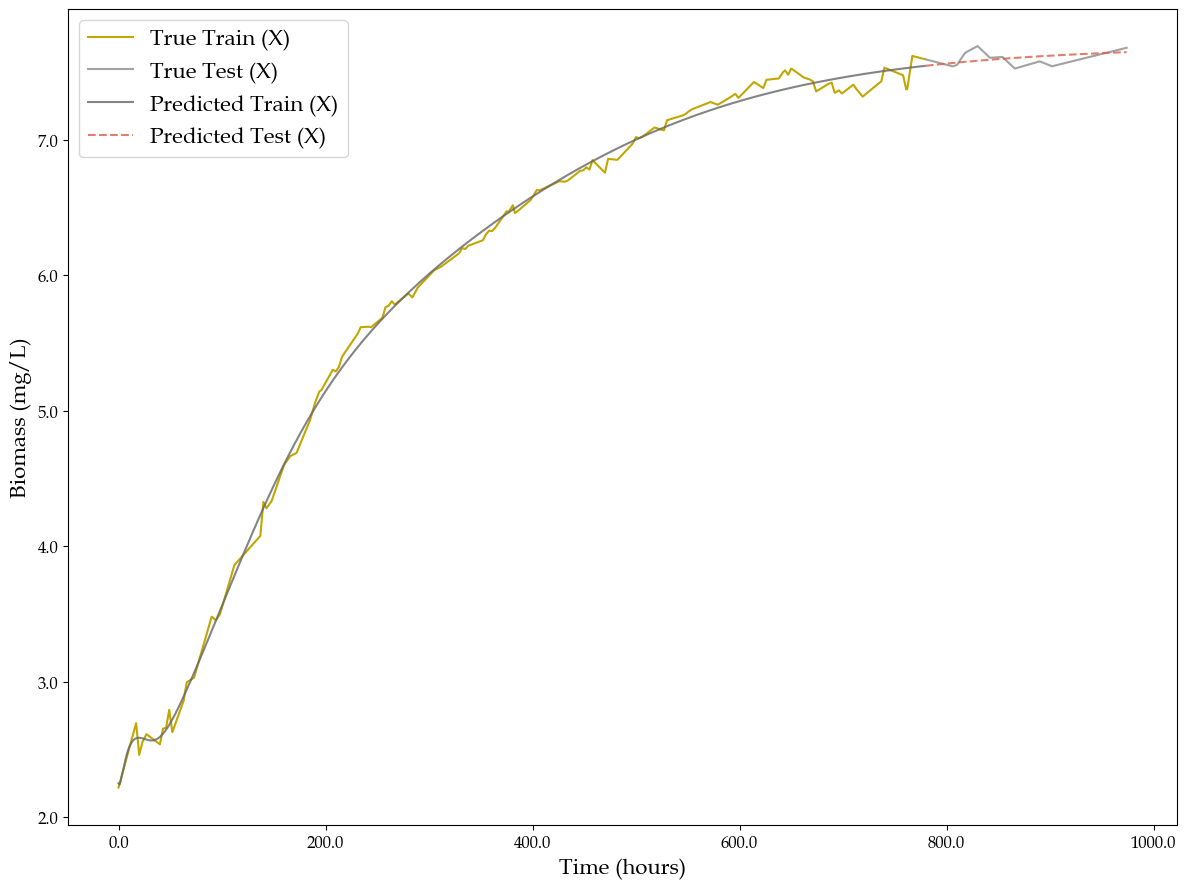

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load and preprocess the dataset
df = pd.read_csv(r"C:\Users\karth\ANN\Time series\Modified_karthi\Primary data_Timeseries.csv")
df = df.interpolate(method='linear', axis=0)  # Handle missing data by interpolation

# Split into training and testing datasets
train = df.iloc[:len(df["Biomass"]) - 195]  # Use the first part as training data
test = df.iloc[len(df["Biomass"]) - 195:]  # Use the rest as testing data

# Convert to tensors
t_train = torch.tensor(train["Hours"].values, dtype=torch.float32).view(-1, 1)  # Training time
X_train = torch.tensor(train["Biomass"].values, dtype=torch.float32).view(-1, 1)  # Training biomass

t_test = torch.tensor(test["Hours"].values, dtype=torch.float32).view(-1, 1)  # Testing time
X_test = torch.tensor(test["Biomass"].values, dtype=torch.float32).view(-1, 1)  # Testing biomass

# Define the PINN
class BiomassPINN(nn.Module):
    def __init__(self):
        super(BiomassPINN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 1)  # Output is biomass (X)
        )
        self.mu_max = nn.Parameter(torch.tensor(0.5, requires_grad=True))
        self.K_s = nn.Parameter(torch.tensor(1.0, requires_grad=True))

    def forward(self, t):
        return self.network(t)

# Define Physics Loss
def physics_loss(model, t):
    t.requires_grad = True
    X_pred = model(t)
    dX_dt = torch.autograd.grad(X_pred, t, grad_outputs=torch.ones_like(X_pred), create_graph=True)[0]

    # Monod equation residual
    mu = model.mu_max * X_pred / (model.K_s + X_pred)
    residual = dX_dt - mu * X_pred

    return torch.mean(residual**2)

# Training Loop
def train_pinn(model, t_data, X_data, epochs=5000, lr=1e-4):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        # Data loss
        X_pred = model(t_data)
        data_loss = torch.mean((X_pred - X_data)**2)

        # Physics loss
        phys_loss = physics_loss(model, t_data)

        # Total loss
        loss = data_loss + phys_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

# Initialize and train the PINN
model = BiomassPINN()
train_pinn(model, t_train, X_train, epochs=10000, lr=1e-4)

# Predictions for train and test datasets
outputs_train = model(t_train).detach().numpy()  # Detach tensor to avoid gradient issues
outputs_test = model(t_test).detach().numpy()  # Detach tensor to avoid gradient issues

# Evaluate the model using MAPE, MAE, RMSE
mape_train = mean_absolute_percentage_error(X_train.numpy(), outputs_train)
mape_test = mean_absolute_percentage_error(X_test.numpy(), outputs_test)

mae_train = mean_absolute_error(X_train.numpy(), outputs_train)
mae_test = mean_absolute_error(X_test.numpy(), outputs_test)

mse_train = mean_squared_error(X_train.numpy(), outputs_train)
mse_test = mean_squared_error(X_test.numpy(), outputs_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print(f"Train MAPE: {mape_train}")
print(f"Train MAE: {mae_train}")
print(f"Train RMSE: {rmse_train}")
print()
print(f"Test MAPE: {mape_test}")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")

# Plotting actual vs. predicted values
fig, ax = plt.subplots(figsize=(12, 9))

# Plot true training data
ax.plot(t_train.detach().numpy(), X_train.detach().numpy(),  label="True Train (X)", color="#C1a700")

# Plot true testing data
ax.plot(t_test.detach().numpy(), X_test.detach().numpy(), label="True Test (X)", color="#A3A1A1")

# Plot predicted training data
ax.plot(t_train.detach().numpy(), outputs_train, '-', label="Predicted Train (X)", color="#666666", alpha=0.8)

# Plot predicted testing data
ax.plot(t_test.detach().numpy(), outputs_test, '--', label="Predicted Test (X)", color="#D6604D", alpha=0.8)

# Customize legend
ax.legend(loc='upper left', prop={'size': 16, 'family': 'Book Antiqua'})

# Set axis labels with customized font
font_axis = {'size': 16, 'family': 'Book Antiqua'}
ax.set_xlabel('Time (hours)', **font_axis)
ax.set_ylabel('Biomass (mg/L)', **font_axis)

# Set custom tick labels with font
font_ticks = {'size': 12, 'family': 'Book Antiqua'}
ax.set_xticklabels(ax.get_xticks(), **font_ticks)
ax.set_yticklabels(ax.get_yticks(), **font_ticks)

# Final layout adjustments and save
plt.tight_layout()
plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\models\\Results\\5_PINN.png", dpi=400)
plt.show()

In [30]:
import pandas as pd

# Flatten the arrays to ensure they are 1-dimensional
actual_train = X_train.flatten()  # Assuming X_train is a 2D array
actual_test = X_test.flatten()    # Assuming X_test is a 2D array
predicted_train = outputs_train.flatten()  # Convert predictions to 1D
predicted_test = outputs_test.flatten()    # Convert predictions to 1D

# Create DataFrames for train and test data
train_data = pd.DataFrame({
    'Actual Train': actual_train,
    'Predicted Train': predicted_train
})

test_data = pd.DataFrame({
    'Actual Test': actual_test,
    'Predicted Test': predicted_test
})

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=1)

# Save combined data to an Excel file
combined_data.to_excel("PINN_results.xlsx", index=False)


In [31]:
import pandas as pd

# Calculate residuals for train and test data
train_residuals = train_data['Actual Train'] - train_data['Predicted Train']
test_residuals = test_data['Actual Test'] - test_data['Predicted Test']

# Add residuals to train and test DataFrames
train_data['Train Residuals'] = train_residuals
test_data['Test Residuals'] = test_residuals

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=1)

# Save combined data to an Excel file
combined_data.to_excel("PINN_Residuals_With_Data.xlsx", index=False)


### RVFL

Training Metrics:
MAPE: 0.17%
MAE: 0.0074
MSE: 0.0002
RMSE: 0.0127

Testing Metrics:
MAPE: 0.06%
MAE: 0.0049
MSE: 0.0000
RMSE: 0.0057


C:\Users\karth\AppData\Local\Temp\ipykernel_14316\3381160847.py:114: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), **font)
C:\Users\karth\AppData\Local\Temp\ipykernel_14316\3381160847.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), **font)


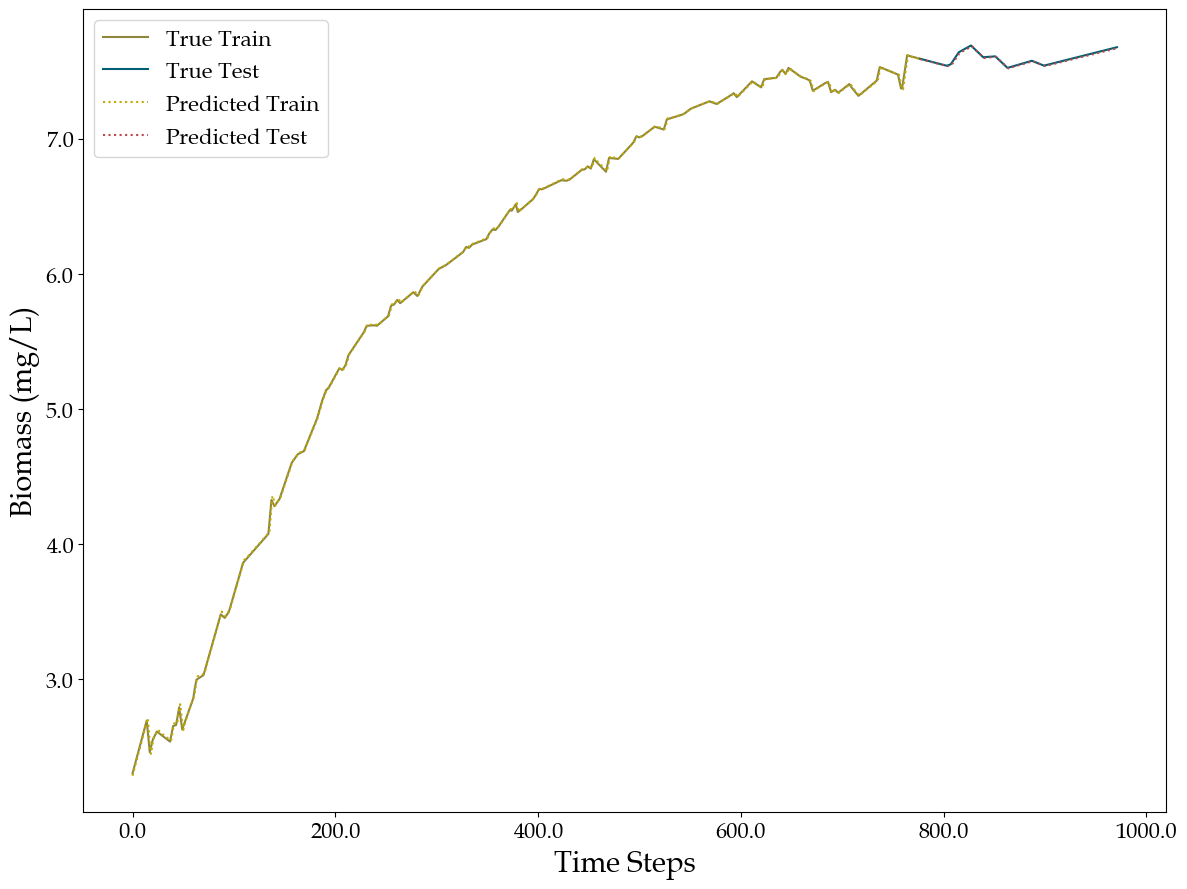

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from numpy.linalg import pinv

np.random.seed(42)
# Load and preprocess the data
df = pd.read_csv(r"C:\Users\karth\ANN\Time series\Modified_karthi\Primary data_Timeseries.csv")
df = df.interpolate(method='linear', axis=0)

# Assuming 'Biomass' is the target column
data = df['Biomass'].values

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Generate lagged features
def create_lagged_features(data, lag):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)

lag = 3
X, y = create_lagged_features(data_scaled, lag)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# RVFL model
class RVFL:
    def __init__(self, input_dim, hidden_units, activation=np.tanh, regularization=0.0):
        self.hidden_units = hidden_units
        self.activation = activation
        self.regularization = regularization
        self.input_dim = input_dim
        self.weights = np.random.uniform(-1, 1, (input_dim, hidden_units))
        self.biases = np.random.uniform(-1, 1, hidden_units)

    def fit(self, X, y):
        H = self.activation(np.dot(X, self.weights) + self.biases)
        H = np.hstack([X, H])  # Include direct input connections
        if self.regularization > 0:
            self.beta = np.dot(pinv(H.T @ H + self.regularization * np.eye(H.shape[1])) @ H.T, y)
        else:
            self.beta = np.dot(pinv(H), y)

    def predict(self, X):
        H = self.activation(np.dot(X, self.weights) + self.biases)
        H = np.hstack([X, H])  # Include direct input connections
        return np.dot(H, self.beta)

# Train and predict
rvfl = RVFL(input_dim=lag, hidden_units=20, activation=np.tanh, regularization=0.01)
rvfl.fit(X_train, y_train)

# Predictions
predictions_train = rvfl.predict(X_train)
predictions_test = rvfl.predict(X_test)

# Inverse transform predictions and actual values
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions_train_inverse = scaler.inverse_transform(predictions_train.reshape(-1, 1)).flatten()
predictions_test_inverse = scaler.inverse_transform(predictions_test.reshape(-1, 1)).flatten()

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate the model using MAPE, MAE, MSE, and RMSE
mape_train = mean_absolute_percentage_error(y_train_inverse, predictions_train_inverse)
mape_test = mean_absolute_percentage_error(y_test_inverse, predictions_test_inverse)

mae_train = mean_absolute_error(y_train_inverse, predictions_train_inverse)
mae_test = mean_absolute_error(y_test_inverse, predictions_test_inverse)

mse_train = mean_squared_error(y_train_inverse, predictions_train_inverse)
mse_test = mean_squared_error(y_test_inverse, predictions_test_inverse)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("Training Metrics:")
print(f"MAPE: {mape_train:.2f}%")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print()
print("Testing Metrics:")
print(f"MAPE: {mape_test:.2f}%")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

# Plot true train, true test, predicted train, and predicted test
font = {'fontname': 'Book Antiqua', 'fontsize': 16}
font_axis = {'fontname': 'Book Antiqua', 'fontsize': 21}

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(range(len(y_train_inverse)), y_train_inverse, label="True Train", color="#8e883d")
ax.plot(range(len(y_train_inverse), len(y_train_inverse) + len(y_test_inverse)), y_test_inverse, label="True Test", color="#005f73")
ax.plot(range(len(predictions_train_inverse)), predictions_train_inverse, label="Predicted Train", linestyle=":", color="#C1a700")
ax.plot(range(len(predictions_train_inverse), len(predictions_train_inverse) + len(predictions_test_inverse)), predictions_test_inverse, label="Predicted Test", linestyle=":", color="#bc4749")
ax.legend(loc='upper left', prop={'size': 16, 'family': 'Book Antiqua'})
ax.set_xticklabels(ax.get_xticks(), **font)
ax.set_yticklabels(ax.get_yticks(), **font)
ax.set_xlabel('Time Steps', **font_axis)
ax.set_ylabel('Biomass (mg/L)', **font_axis)
plt.tight_layout()
plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\models\\Results\\RVFL_Biomass.png", dpi=400)
plt.show()


In [34]:
import pandas as pd

# Create DataFrames for train and test data
train_data = pd.DataFrame({
    'Actual Train': y_train_inverse,  # Actual train values (inverse transformed)
    'Predicted Train': predictions_train_inverse  # Predicted train values (inverse transformed)
})

test_data = pd.DataFrame({
    'Actual Test': y_test_inverse,  # Actual test values (inverse transformed)
    'Predicted Test': predictions_test_inverse  # Predicted test values (inverse transformed)
})

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=1)

# Save combined data to an Excel file
combined_data.to_excel("6_RVFL.xlsx", index=False)


In [35]:
import pandas as pd

# Calculate residuals for train and test data
train_residuals = y_train_inverse - predictions_train_inverse
test_residuals = y_test_inverse - predictions_test_inverse

# Create DataFrames for train and test data, including residuals
train_data = pd.DataFrame({
    'Actual Train': y_train_inverse,  # Actual train values (inverse transformed)
    'Predicted Train': predictions_train_inverse,  # Predicted train values (inverse transformed)
    'Train Residuals': train_residuals  # Residuals for train data
})

test_data = pd.DataFrame({
    'Actual Test': y_test_inverse,  # Actual test values (inverse transformed)
    'Predicted Test': predictions_test_inverse,  # Predicted test values (inverse transformed)
    'Test Residuals': test_residuals  # Residuals for test data
})

# Concatenate train and test data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=1)

# Save combined data to an Excel file
combined_data.to_excel("RVFL_Residuals_With_Data.xlsx", index=False)


## Supporting files

### Prophet

In [73]:
#cross validation
df_cv = cross_validation(model, initial='600 hours', period='195 hours', horizon = '80 hours')
df_p = performance_metrics(df_cv)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]18:20:01 - cmdstanpy - INFO - Chain [1] start processing
18:20:02 - cmdstanpy - INFO - Chain [1] done processing
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]


C:\Users\karth\AppData\Local\Temp\ipykernel_10440\3933927436.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),**font)
C:\Users\karth\AppData\Local\Temp\ipykernel_10440\3933927436.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(),**font)


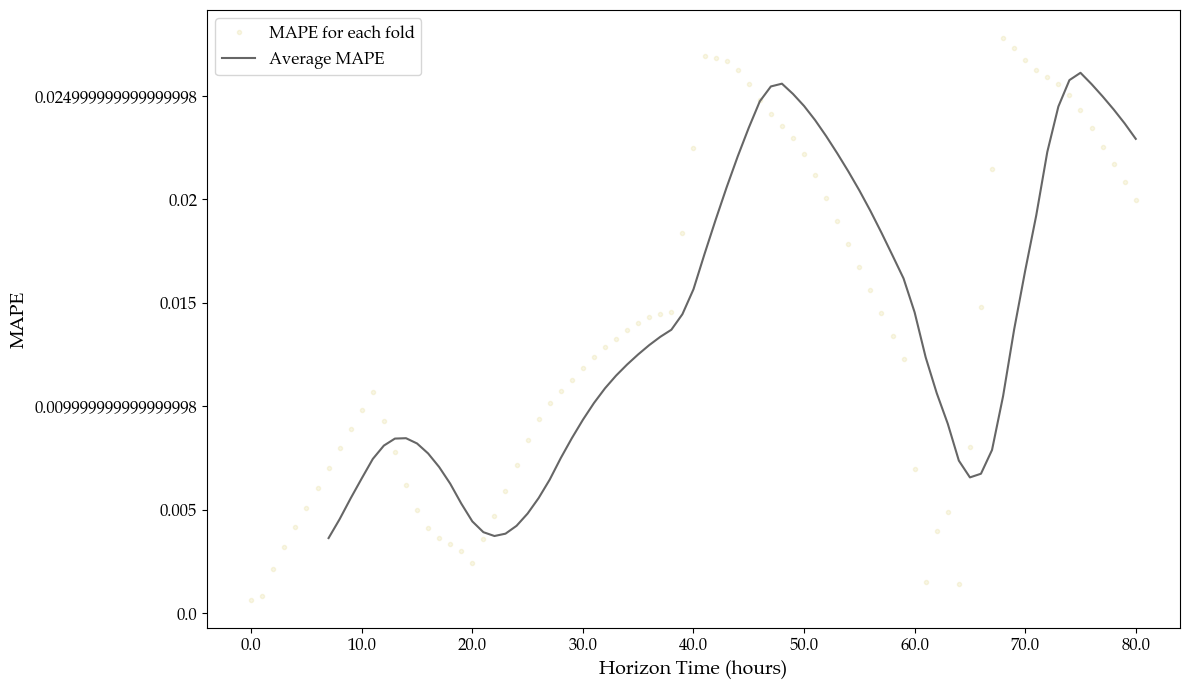

In [67]:
# cross validations results
from prophet.plot import plot_cross_validation_metric
font = {'fontname': 'Book Antiqua', 'fontsize': 12}
font_axis = {'fontname': 'Book Antiqua', 'fontsize': 14}
fig, ax = plt.subplots(figsize=(12, 7))
plot_cross_validation_metric(df_cv, metric='mape', ax=ax)
ax.set_xticklabels(ax.get_xticks(),**font)
ax.set_yticklabels(ax.get_yticks(),**font)
lines = ax.get_lines()
lines[0].set_color('#C1a700')
lines[1].set_color('#666666')
ax.set_xlabel('Horizon Time (hours)',**font_axis)
ax.set_ylabel('MAPE', **font_axis)
ax.grid(False)
ax.legend(['MAPE for each fold', 'Average MAPE'], loc='upper left', prop={'size': 12, 'family': 'Book Antiqua'})
plt.tight_layout()
#plt.savefig("C:\\Users\\karth\\ANN\\Time series\\Modified_karthi\\Biomass_actual and forecast.png", dpi=1200)
plt.show()

### Transformers model

In [42]:
import pandas as pd
from darts import TimeSeries
from darts.models import TransformerModel
import matplotlib.pyplot as plt
import numpy as np  # Import numpy
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Import metrics

# Load and interpolate data
df = pd.read_csv(r"C:\Users\The Net Zero Lab\Karthi\Primary data_Timeseries.csv")

df = df.interpolate(method='linear', axis=0)

# Create TimeSeries data for Darts
biomass_series = TimeSeries.from_series(df['Biomass'])

# Split the data for training and testing
train, test = biomass_series[:-195], biomass_series[-195:]

# Initialize the Transformer model
model = TransformerModel(
    input_chunk_length=48,  # Input sequence length
    output_chunk_length=24,  # Forecast length
    d_model=128,  # Dimension of model
    nhead=4,  # Number of heads in multihead attention
    num_encoder_layers=4,
    num_decoder_layers=4,
    dropout=0.1,
    batch_size=64,
    n_epochs=50,
    model_name="transformer_biomass",
    random_state=42
)

# Train the model
model.fit(train)

C:\Users\The Net Zero Lab\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics       | MetricCollection    | 0      | train
4 | val_metrics         | MetricCollection    | 0      | train
5 | encoder             | Linear              | 256    | train
6 | positional_encoding | _PositionalEncoding | 0     

Epoch 49: 100%|█████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.04it/s, train_loss=0.0878]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|█████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.04it/s, train_loss=0.0878]


TransformerModel(output_chunk_shift=0, d_model=128, nhead=4, num_encoder_layers=4, num_decoder_layers=4, dim_feedforward=512, dropout=0.1, activation=relu, norm_type=None, custom_encoder=None, custom_decoder=None, input_chunk_length=48, output_chunk_length=24, batch_size=64, n_epochs=50, model_name=transformer_biomass, random_state=42)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.66it/s]


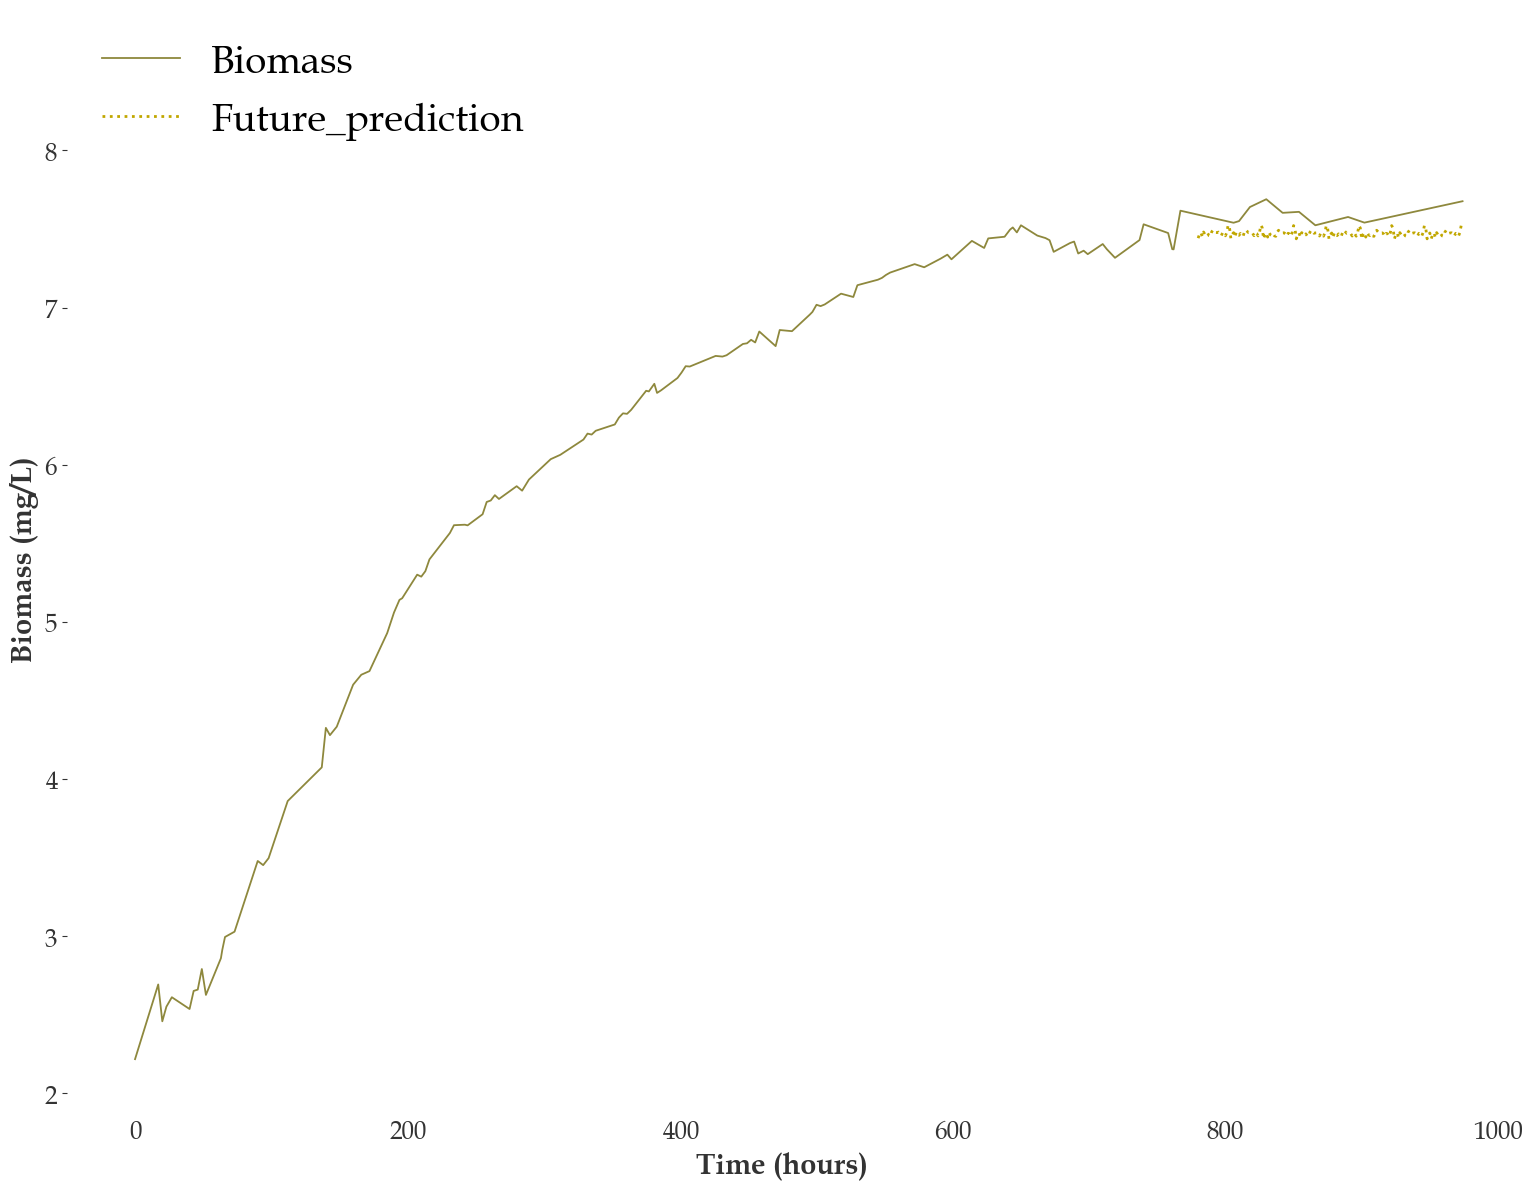

In [43]:
import matplotlib.pyplot as plt

font = {'fontname': 'Book Antiqua', 'fontsize': 28}
font_axis = {'fontname': 'Book Antiqua', 'fontsize': 28}

# Predict the future values
forecast = model.predict(n=195)

# Plotting the results
fig, ax = plt.subplots(figsize=(15.428568, 12))

# Plot original biomass data
df['Biomass'].plot(label='Biomass', color='#8e883d', ax=ax)

# Plot forecasted data
forecast.plot(ax=ax, label='Future_prediction', color='#C1a700', linestyle=':')

# Customize plot appearance
ax.set_xlabel('Time (hours)', fontname='Book Antiqua', fontsize=21)
ax.set_ylabel('Biomass (mg/L)', fontname='Book Antiqua', fontsize=21)
ax.legend(loc='upper left', prop={'size': 28, 'family': 'Book Antiqua'})

# Optional: Define font properties for ticks
font = {'fontname': 'Book Antiqua', 'fontsize': 18}
ax.set_xticks(ax.get_xticks())  # Ensure ticks are correctly updated
ax.set_xticklabels([f'{x:.0f}' for x in ax.get_xticks()], **font)
ax.set_yticks(ax.get_yticks())  # Ensure y-ticks are explicitly updated
ax.set_yticklabels([f'{y:.0f}' for y in ax.get_yticks()], **font)

# Set axis limits
ax.set_xlim(-50, 1000)
ax.set_ylim(1.9, 8.9)

# Remove grid
ax.grid(False)

# Set x and y axis lines to black
ax.spines['bottom'].set_color('black')  # x-axis
ax.spines['left'].set_color('black')    # y-axis

# Optional: Set color for top and right spines if needed (can be hidden)
ax.spines['top'].set_color('none')      # Hide top spine
ax.spines['right'].set_color('none')    # Hide right spine

# Save the figure
plt.savefig("C:\\Users\\The Net Zero Lab\\Karthi\\2_LSTM.png", dpi=400)

# Ensure the layout fits within the figure area
plt.tight_layout()

# Display the plot
plt.show()


### Sensitivity 

### fired man test

In [12]:
df=pd.read_csv(r"C:\Users\karth\ANN\Time series\Modified_karthi\stat.csv")

In [13]:
df = df.interpolate(method='linear', axis=0)

In [14]:
df

,time,DCW value 1,DCW value 2,DCW value 3
0,0.0,2.205000,2.221000,2.228000
1,1.0,2.234647,2.249176,2.254059
2,2.0,2.264294,2.277353,2.280118
3,3.0,2.293941,2.305529,2.306176
4,4.0,2.323588,2.333706,2.332235
...,...,...,...,...
970,970.0,7.570778,7.751944,7.685556
971,971.0,7.569583,7.757708,7.686667
972,972.0,7.568389,7.763472,7.687778
973,973.0,7.567194,7.769236,7.688889


In [18]:
from scipy.stats import friedmanchisquare
# Perform Friedman test
stat, p = friedmanchisquare(df["DCW value 1"], df["DCW value 2"], df["DCW value 3"])


print(f"Friedman Test Statistic: {stat}")
print(f"p-value: {p}")

# Interpretation
if p < 0.05:
    print("Significant differences among replicates (reject null hypothesis).")
else:
    print("No significant differences among replicates (fail to reject null hypothesis).")


Friedman Test Statistic: 243.97327852004187
p-value: 1.051660841857028e-53
Significant differences among replicates (reject null hypothesis).
